In [1]:
#Imports and pre-defined functions
from interpreter import *
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram

def plot_counts(qc,shots=3000):
    assert qc.num_clbits > 0, "There are no classical bits to measure."
    sim = Aer.get_backend('qasm_simulator')
    counts = execute(qc,sim,shots=shots).result().get_counts()
    return plot_histogram(counts)

def get_unitary(circ):
    sim = Aer.get_backend('unitary_simulator')
    U = execute(circ,sim).result().get_unitary()
    return U

# QASM to qiskit.QuantumCircuit
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$\newcommand{\abs}[1]{\left|{#1}\right|}$


This excercise is related to interpreting QASM code and converting it into a qiskit QuantumCircuit object. This attempt supports both direct qasm strings and qasm files. For details about how this works, visit the ```interpreter.py``` file. 

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\xor}[0]{\oplus}$

# Example 1: Bell State


A Bell State could be implemented by a two qubit quantum circuit in which both qubits are maximally entangled. For example, a $\phi^{+}$ state could be implemented by 1 Hadamard and a CNOT. The qasm code for this is:


                                            OPENQASM 3.0;
                                            include "qelib1.inc";

                                            qreg q[2];
                                            creg c[2];

                                            h q[0];
                                            cx q[0],q[1];


Note: This example tests the basic functionality

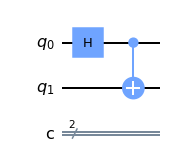

In [2]:
phi_plus = interpreter('OPENQASM 3.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\n')
phi_plus.draw('mpl')

## Example 2: Swap Test

A very well known application to the SWAP gate is what is called the SWAP Test, which uses a control swap gate gate (aka Fredkin gate) to compare two qubit states, as shown bellow

<img src="assets/swaptest.jpg" width="250px">

The output of the test is described by the measurement of the zeroth qubit, which will be measured as 0 100% of the time if both states are equal (i.e $\braket{\phi}{\psi}=1$) and will be measured as 0 50% of the time if the two states are orthogonal (i.e $\braket{\phi}{\psi}=0$). 

The QASM code for a {$\ket{+},\ket{0}$} SWAP test is:

                                                include "qelib1.inc";

                                                qreg q[3];
                                                creg c[3];

                                                h q[0];
                                                h q[1];
                                                cswap q[0],q[1],q[2];
                                                h q[0];
                                                measure q[0] -> c[0];
                                                
                                                
Note: This example tests measurement

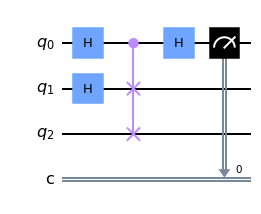

In [3]:
swap_test = interpreter('OPENQASM 3.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[1];\nh q[1];\nh q[0];\ncswap q[0],q[1],q[2];\nh q[0];\nmeasure q[0] -> c[0];\n')
swap_test.draw('mpl')


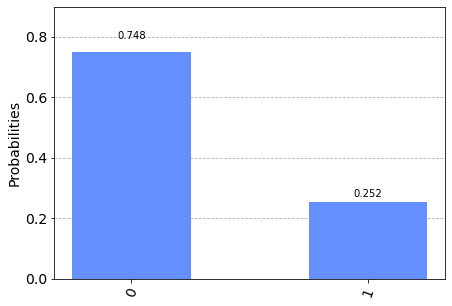

In [4]:
plot_counts(swap_test)

# Example 3: Qubit Grover 

Note: For brevity's sake, the background given is a non-technical (and not completely accurate) one. For a more 
thorough introduction, look at the <a href="https://qiskit.org/textbook/ch-algorithms/grover.html">Qiskit Textbook</a>

One of the most common tasks to do on a computer is searching. Classically, search is usually done by means of trial and error. For instance, to search a list with $n$ items, a classical computer will go through every $i$-th item, meaning that the complexity of searching a list grows linearly with the number of items in that list. However, in the late 90s, Indian computer scientist Lov Grover developed a quantum algorithm for search, in which the complexity of search grows linearly with the square root of the size of the list, $O(\sqrt{n})$. For reference, here is a comparison of $O(n)$ and $O(\sqrt{n})$:

<img src="assets/grovercomp.jpg">


This quadratic speedup is, until this day, one of the most prominent findings in the field of quantum computation.

Grover's algorithm, although a slightly intermediate topic, can be briefly described by the following process:

`1. Initialization`: Initialize all qubits to the $\ket{+}^{\otimes n}$ state. In other words, apply a Hadamard on all $n$ qubits

`2. Oracle`: "Encodes" your search target into the quantum circuit

`3.Amplification`: Increases the probability of obtaining the target state

`4. Iteration`: Grover iteration is essentially the process of iterating steps 2 and 3 $\frac{\pi\sqrt{N}}{4} - \frac{1}{2}$ (well, the closest integer to that) times.

The Oracle Architecture for a bit search is an $n$-qubit generalization of the one shown in page 13 of <a href="http://www.diva-portal.org/smash/get/diva2:1214481/FULLTEXT01.pdf">this paper</a> 

Note: This example tests importing qasm files rather than strings

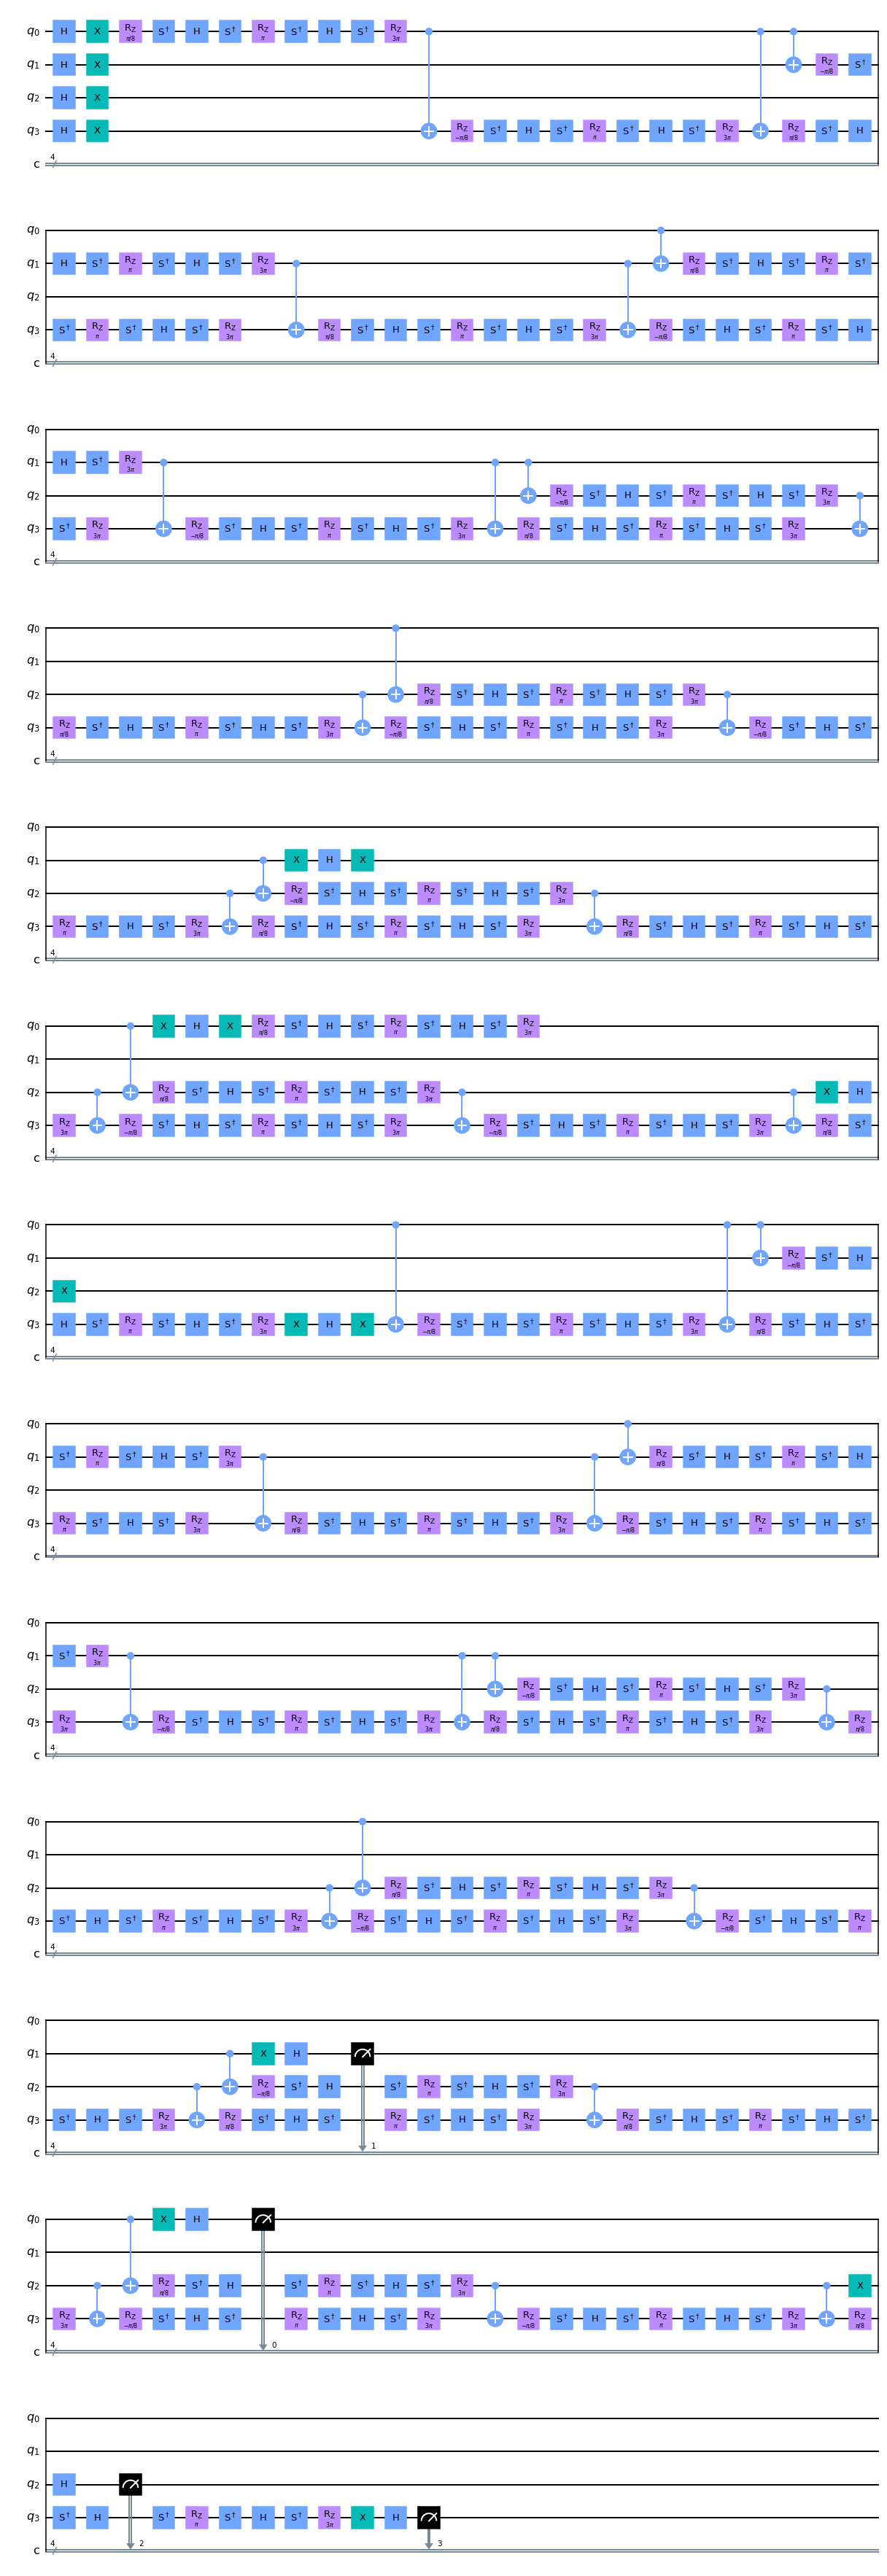

In [5]:
grover_circ = interpreter('grover.qasm')
grover_circ.draw('mpl')

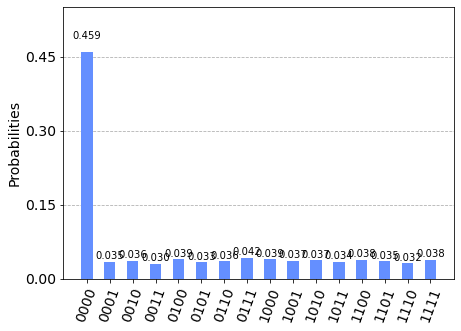

In [6]:
plot_counts(grover_circ) 
#Note, because this has been transpiled to the required gate set, we do not get the expected 0.96 prob for '0000'

## Example 4: 8-QFT$^{\dagger}$

The Fourier transform is a very important concept in fields ranging from quantum mechanics to digital signal processing. Its descrete version, the DFT, is a unitary operator meaning that a 2^n dimensional DFT could be implemented by a n qubit circuit called a QFT. Here, we implement a 3 qubit QFT and calculate its dagger (another useful operator) using the ```get_dg()``` function.

Note: this example tests the dagger function and qasm file support.

In [7]:
qft = interpreter('qft.qasm')
qft_dg = get_dg(qft)

In [8]:
if np.isclose(get_unitary(qft).transpose().conjugate(),get_unitary(qft_dg)).all():
    print("The `get_dg()` function works!")
else:
    print("The `get_dg()` function doesn't work")

The `get_dg()` function works!
